In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.special import entr
from sklearn.metrics import accuracy_score
import operator
import matplotlib.pyplot as plt

In [2]:
# Prepare training and testing
TrainingData = pd.DataFrame(np.transpose(np.array([[1,2,6], [1,4,4]])))
TrainingLabels=np.array([1,2,3])
TrainingData=TrainingData.to_numpy()

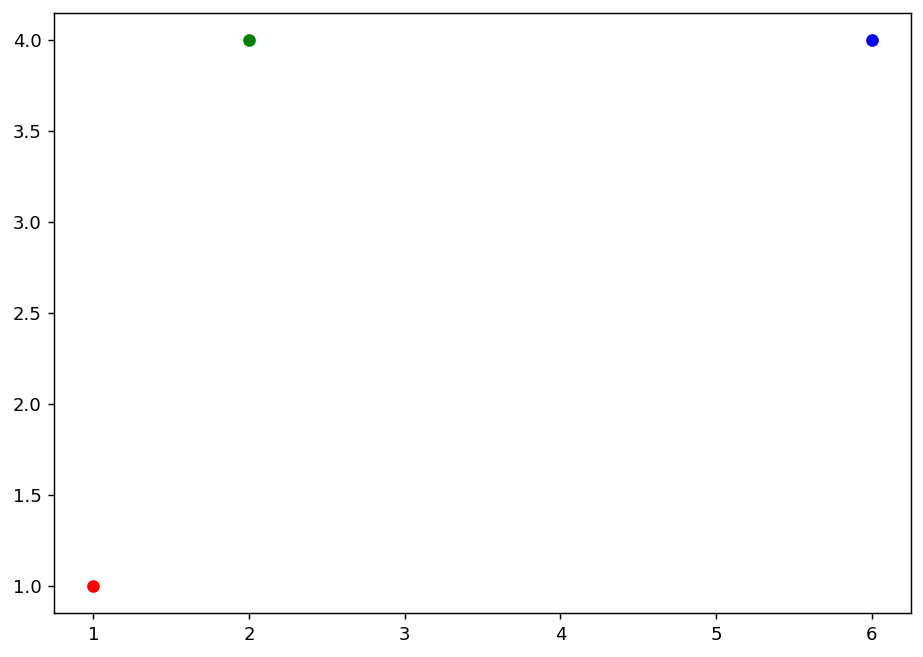

In [3]:
# Plot our training data
plt.figure(figsize=(8.5, 6), dpi=130)
plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro')
plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go')
plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo')
plt.show()

In [4]:
# the pool of unlabeled data points
TestingData = pd.DataFrame(np.transpose(np.array([[2,1,2,3,3,2,1,5,6,4], [1,2,2,2,3,3,4,3,2,3]])))
TestingLabels=np.array([1,1,1,1,2,2,2,3,3,3])
TestingData=TestingData.to_numpy()

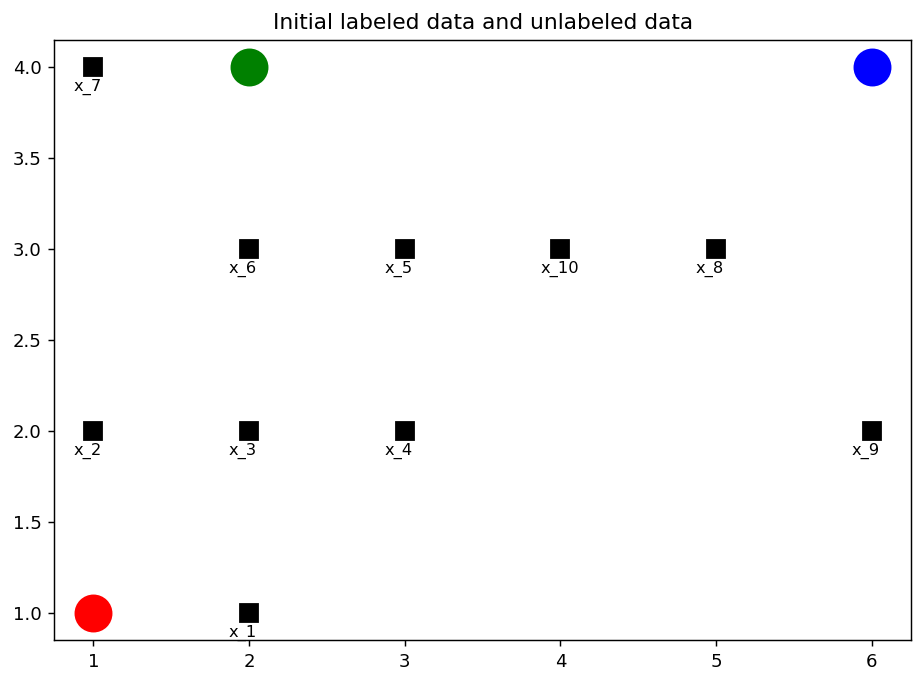

In [5]:
# Plot our training/labeled data and unlabeled data
plt.figure(figsize=(8.5, 6), dpi=130)
plt.title("Initial labeled data and unlabeled data")
plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=20)
plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=20)
plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=20)
plt.plot(np.transpose(TestingData[:,0]),np.transpose(TestingData[:,1]), 'ks', markersize=10)
for i in range(TestingData.shape[0]):
    Text='x_' + str(i+1)
    plt.text(TestingData[i,0]-0.13, TestingData[i,1]-0.13,Text,fontsize=9)
plt.show()

In [6]:
# train a model on TrainingData, calculate the accuracy of TestingData
clf = RandomForestClassifier(n_estimators = 10, random_state = 1) 
clf.fit(TrainingData, TrainingLabels) 
# calculate prediction probabilities of the unlabeled data
predictions = clf.predict(TestingData) 
Accuracy= np.array(accuracy_score(predictions, TestingLabels))
Accuracy=Accuracy.reshape((1,1))
predicted_probs = clf.predict_proba(TestingData) 
print(predicted_probs) 
entropy_array = entr(predicted_probs).sum(axis=1)
print(entropy_array)

[[0.1 0.8 0.1]
 [0.6 0.3 0.1]
 [0.1 0.8 0.1]
 [0.1 0.8 0.1]
 [0.1 0.8 0.1]
 [0.1 0.8 0.1]
 [0.6 0.3 0.1]
 [0.1 0.3 0.6]
 [0.1 0.3 0.6]
 [0.1 0.8 0.1]]
[0.63903186 0.89794572 0.63903186 0.63903186 0.63903186 0.63903186
 0.89794572 0.89794572 0.89794572 0.63903186]


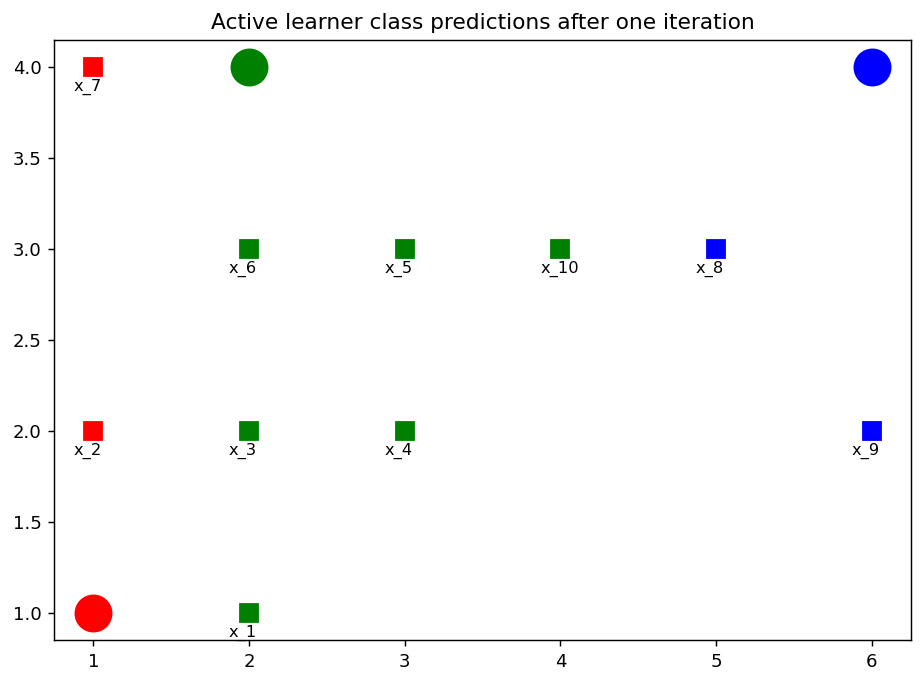

In [7]:
plt.figure(figsize=(8.5, 6), dpi=130)
plt.title("Active learner class predictions after one iteration")
plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=20)
plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=20)
plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=20)
plt.plot(np.transpose(TestingData[predictions==1,0]),np.transpose(TestingData[predictions==1,1]), 'rs', markersize=10)
plt.plot(np.transpose(TestingData[predictions==2,0]),np.transpose(TestingData[predictions==2,1]), 'gs', markersize=10)
plt.plot(np.transpose(TestingData[predictions==3,0]),np.transpose(TestingData[predictions==3,1]), 'bs', markersize=10)
for i in range(TestingData.shape[0]):
    Text='x_' + str(i+1)
    plt.text(TestingData[i,0]-0.13, TestingData[i,1]-0.13,Text,fontsize=9)
plt.show()

In [8]:
# select the most uncertain point (with max entropy) in the testing data 
index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))

# least confident
#uncertainties = np.amax(predicted_probs, axis=1)
#index=np.where(uncertainties == uncertainties.min())

# least margin
#predicted_probs.sort()
#uncertainties = predicted_probs[:, -1] - predicted_probs[:,-2]
#index=np.where(uncertainties == uncertainties.min())
print('The most uncertain point is No.', index)

The most uncertain point is No. 1


In [9]:
# add the new annotated point to the training data
TrainingData=np.concatenate((TrainingData,np.array(TestingData[index,:]).reshape(1,2)),axis=0)
TrainingLabels= np.append(TrainingLabels,np.array(TestingLabels[index]).reshape(1,1))

In [10]:
# delete the annotated point from the testing data (pool)
TestingData=np.delete(TestingData,index, axis=0)
TestingLabels=np.delete(TestingLabels,index, axis=0)

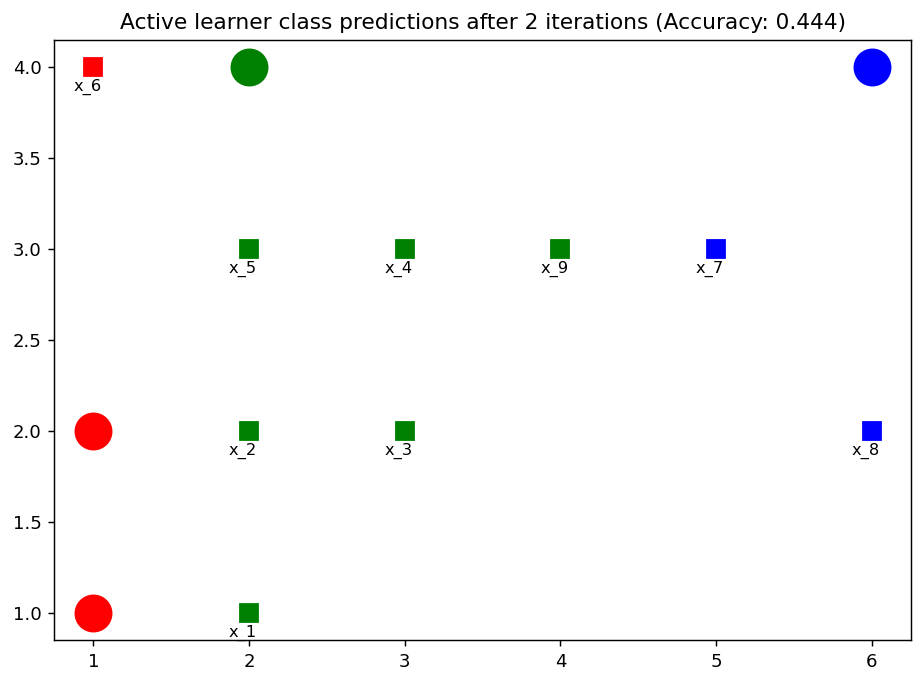

[[0.4 0.6 0. ]
 [0.4 0.6 0. ]
 [0.4 0.6 0. ]
 [0.3 0.6 0.1]
 [0.3 0.6 0.1]
 [0.7 0.2 0.1]
 [0.2 0.3 0.5]
 [0.3 0.3 0.4]
 [0.2 0.6 0.2]]
[0.67301167 0.67301167 0.67301167 0.89794572 0.89794572 0.80181855
 1.02965301 1.08889998 0.95027054]
The most uncertain point is No. 7


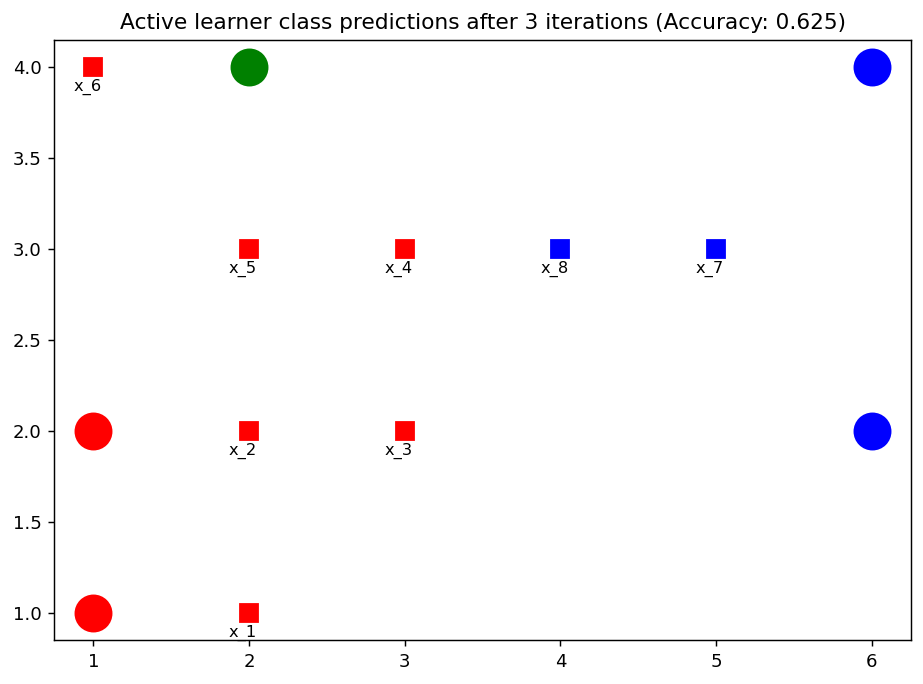

[[0.5 0.2 0.3]
 [0.5 0.2 0.3]
 [0.5 0.2 0.3]
 [0.5 0.2 0.3]
 [0.5 0.2 0.3]
 [0.6 0.2 0.2]
 [0.1 0.  0.9]
 [0.2 0.2 0.6]]
[1.02965301 1.02965301 1.02965301 1.02965301 1.02965301 0.95027054
 0.32508297 0.95027054]
The most uncertain point is No. 0


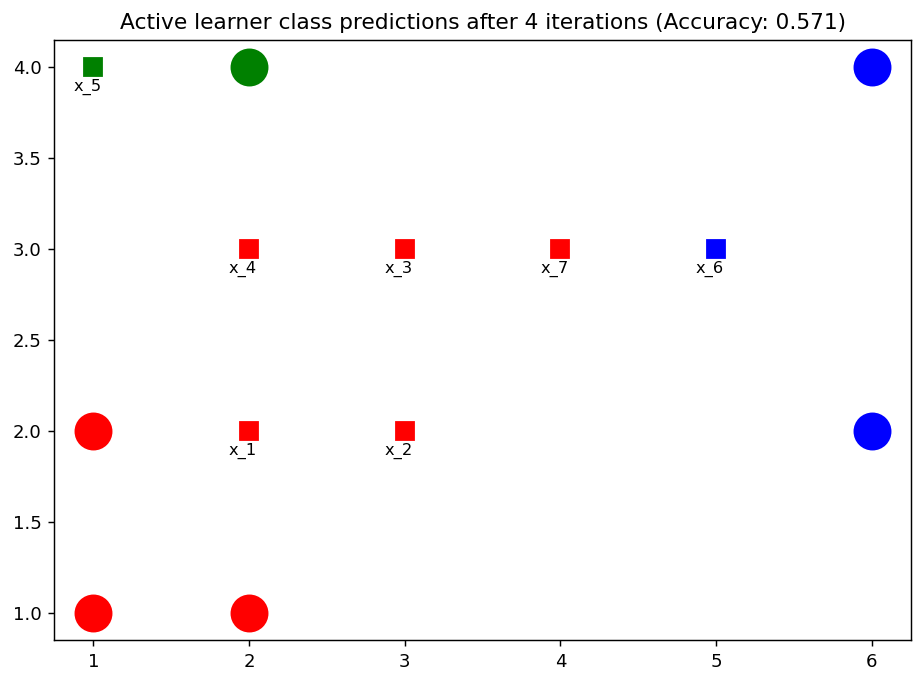

[[0.9 0.  0.1]
 [0.9 0.  0.1]
 [0.7 0.2 0.1]
 [0.7 0.2 0.1]
 [0.4 0.5 0.1]
 [0.1 0.  0.9]
 [0.5 0.2 0.3]]
[0.32508297 0.32508297 0.80181855 0.80181855 0.94334839 0.32508297
 1.02965301]
The most uncertain point is No. 6


In [11]:
# Iteratively annotate one point
for i in range(3):
    clf.fit(TrainingData, TrainingLabels) 
    predictions = clf.predict(TestingData) 
    Accuracy= np.append(Accuracy, np.array(accuracy_score(predictions, TestingLabels)))
    plt.figure(figsize=(8.5, 6), dpi=130)
    plt.title("Active learner class predictions after " + str(i+2) +  " iterations (Accuracy: {Acc:.3f})".format(Acc=np.array(accuracy_score(predictions, TestingLabels))))
    plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=20)
    plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=20)
    plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=20)
    plt.plot(np.transpose(TestingData[predictions==1,0]),np.transpose(TestingData[predictions==1,1]), 'rs', markersize=10)
    plt.plot(np.transpose(TestingData[predictions==2,0]),np.transpose(TestingData[predictions==2,1]), 'gs', markersize=10)
    plt.plot(np.transpose(TestingData[predictions==3,0]),np.transpose(TestingData[predictions==3,1]), 'bs', markersize=10)
    for i in range(TestingData.shape[0]):
        Text='x_' + str(i+1)
        plt.text(TestingData[i,0]-0.13, TestingData[i,1]-0.13,Text,fontsize=9)
    plt.show()
    
    predicted_probs = clf.predict_proba(TestingData) 
    print(predicted_probs) 
    entropy_array = entr(predicted_probs).sum(axis=1)
    print(entropy_array)
    index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))
    print('The most uncertain point is No.', index)
    
    # add the new selected point to the labeled data
    TrainingData=np.concatenate((TrainingData,np.array(TestingData[index,:]).reshape(1,2)),axis=0)
    TrainingLabels= np.append(TrainingLabels,np.array(TestingLabels[index]).reshape(1,1))
    
    # delete the annotated point from the testing data (pool)
    TestingData=np.delete(TestingData,index, axis=0)
    TestingLabels=np.delete(TestingLabels,index, axis=0)

In [12]:
print(Accuracy)

[0.5        0.44444444 0.625      0.57142857]
